In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import linalg as LA

Из явной схемы Эйлера получаем:
$$
y^{n+1}_m = y^n_m - \tau\Bigg( \frac{y^n_{m+1} - y^n_{m-1}}{2h} \Bigg)
$$
Из схемы Лакса-Вендроффа:
$$
y^{n+1}_m = y^n_m - \tau \Bigg(\frac{y^n_{m+1} - y^n_{m-1}}{2h} -\frac{\tau}{2}\frac{y^n_{m+1} - 2y^n_m + y^n_{m-1}}{h^2}     \Bigg)
$$
Для рассчета точек на краю будем использовать полностью симметричную схему и из нее получим:
$$
y^{n+1}_{m+1} = \frac{\frac{y^{n}_{m+1}-y^{n+1}_m - y^n_m}{2\tau} + \frac{y^{n+1}_m - y^{n}_{m+1} - y^n_m}{h}}{\Big(\frac{1}{2\tau} + \frac{1}{h}\Big)}
$$

In [411]:
#Точное решение при T = 9
def f(x):
    if x <= 14:
        return 1
    else:
        return 0

In [549]:
#Параметры сетки, число Куранта 1.0
dx = 0.5
dt = 0.3*dx
T_max = 9 
M_max = 20
N = int(T_max/dt)
M = int(M_max/dx)

In [550]:
#Начальные данные(время, коорндината)
#Эйлер
y_ei = np.zeros((N+1,M+1))
for j in range(int(5/dx) +1):
    y_ei[0][j] = 1
for i in range(N+1):
    y_ei[i][0] = 1
#Лакс-Вендарофф
y_lak = np.zeros((N+1,M+1))
for j in range(int(5/dx) +1):
    y_lak[0][j] = 1
for i in range(N+1):
    y_lak[i][0] = 1

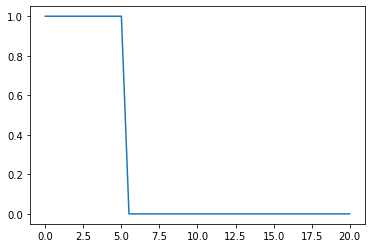

In [551]:
x = np.arange(0,20.0000001,dx)
plt.plot(x,y_ei[0])

In [552]:
#Эйлер:
for i in range(N):
    for j in range(1,M):
        y_ei[i+1][j] = y_ei[i][j] - dt*(y_ei[i][j+1] - y_ei[i][j-1])/(2*dx)
    y_ei[i+1][M] = ((y_ei[i][M] - y_ei[i+1][M-1] - y_ei[i][M-1])/(2*dt) + (y_ei[i+1][M-1] - y_ei[i][M] - y_ei[i][M-1])/(dx))/(1/(2*dt)+1/(dx))

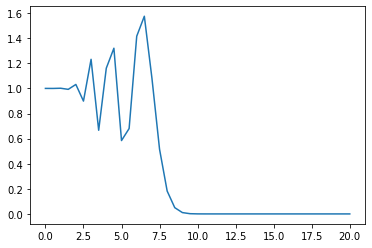

In [553]:
plt.plot(x,y_ei[18])

In [554]:
#Лакс-Вендорфф:
for i in range(N):
    for j in range(1,M):
        y_lak[i+1][j] = y_lak[i][j] - dt*((y_lak[i][j+1] - y_lak[i][j-1])/(2*dx) - dt*(y_lak[i][j-1] - 2*y_lak[i][j] + y_lak[i][j+1])/(2*(dx**2)))
    y_lak[i+1][M] = ((y_lak[i][M] - y_lak[i+1][M-1] - y_lak[i][M-1])/(2*dt) + (y_lak[i+1][M-1] - y_lak[i][M] - y_lak[i][M-1])/(dx))/(1/(2*dt)+1/(dx))

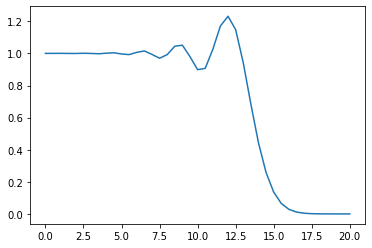

In [555]:
plt.plot(x,y_lak[N])

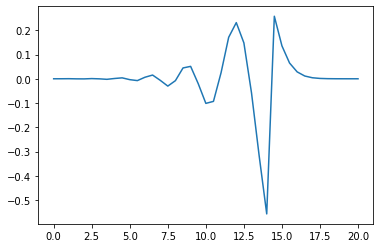

In [556]:
vf = np.vectorize(f)
plt.plot(x,y_lak[N]-vf(x))

In [557]:
maxi = 0
for i in range(N+1):
    a = np.linalg.norm(y_lak[N-i]-vf(x+i*dt),np.inf)
    if (a>maxi):
        maxi = a
maxi

0.58368375

Заметим, что спектральный метод для метода Элейра дает нам следующий спектр:
$$
\lambda = 1 - i \sigma \sin \varphi
$$
В то время как для схемы Лакса-Вендроффа
$$
\lambda = 1 - i\sigma \sin \varphi + \sigma^2(\cos \varphi -1) 
$$
Тоесть схема Эйлера в данном случае устойчивостью не обладает, а схема Лакса-Вендроффа устойчива при:
$$
\sigma \leq 1
$$

Точным решением является ступенька, которая едет вправо со скоростью 1.
Будем смотреть за порядком сходимости. Очевидно, что порядком сходимости имеет смысл смотреть только для схема Лакса-Вендроффа:\
При $\sigma = 1.0$ решение совпадает с точным.\
При $\sigma = 0.6$: \
$\quad$ шаг 0.5 , норма разности равна $0.5530$\
$\quad$ шаг 0.25 , норма разности равна $0.5530$\
$\quad$ шаг 0.125 , норма разности равна $0.5780$\
$\quad$ шаг 0.0625, норма разности равна $0.5975$\
$\quad$Тоесть мы можем увидеть что при этом числе куранта сходимости вообще нет\
При $\sigma = 0.3$: \
$\quad$ шаг 0.5 , норма разности равна $0.5837$\
$\quad$ шаг 0.25 , норма разности равна $0.5837$\
$\quad$ шаг 0.125 , норма разности равна $0.5995$\
$\quad$ шаг 0.0625, норма разности равна $0.6139$\
$\quad$Здесь мы также можем увидеть, что сходимости нет